# Clustering Assignment

In [250]:
# Importing the necessary liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [251]:
# read the dataset
countries_df = pd.read_csv(r'E:\Data Science\clustering assignment\Country-data.csv')
countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Understanding

In [252]:
countries_df.shape

(167, 10)

In [253]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [254]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [255]:
# Finding null values
countries_df_null =  round(100*(countries_df.isnull().sum()/len(countries_df.index)), 6)
countries_df_null

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

##### The dataset does not contain any null value

#### Converting health, import and export columns to actual values

In [256]:
countries_df['health'] = countries_df['health']*countries_df['gdpp']/100


In [257]:
countries_df['exports'] = countries_df['exports']*countries_df['gdpp']/100


In [258]:
countries_df['imports'] = countries_df['imports']*countries_df['gdpp']/100
countries_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Univariate Analysis

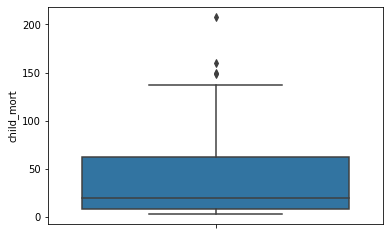

In [259]:
# Plotting the box plot for child mortality

sns.boxplot(y = countries_df['child_mort'])

###### The boxplot for child_mort suggests that the median of the number of children lies around 20. While the maximum of non outlying data is around 140, there are outliers as well, which means, the child mortality rate is exremely high for some countries, going even more than 200.

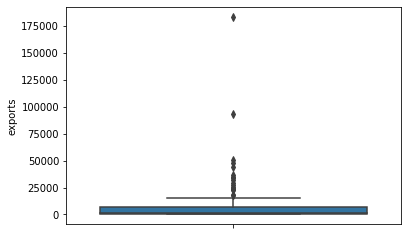

In [260]:
# Plotting the box plot for exports

sns.boxplot(y = countries_df['exports'])

###### The boxplot for exports suggests that while maximum of non outlying data is less than 25000, there are outliers as well, going more than 175000 for some countries.

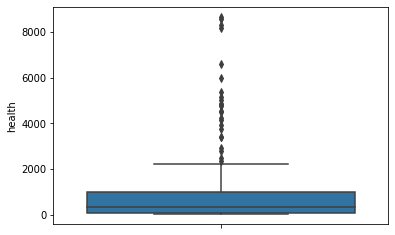

In [261]:
# Plotting the box plot for health

sns.boxplot(y = countries_df['health'])

###### The boxplot for health suggests  the maximum of non outlying data lies around 2000.Also, there are outliers as well, going till more than 8000.

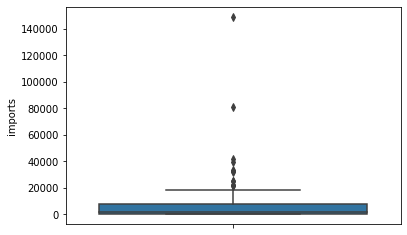

In [262]:
# Plotting the box plot for imports

sns.boxplot(y = countries_df['imports'])

###### The boxplot for imports suggests that the maximum of non outlying data is around 20000. There are outliers as well, which means, the imports is extemely high for some countries, going upto more than 140000

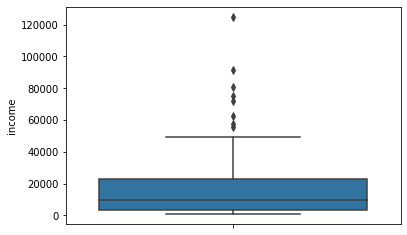

In [263]:
# Plotting the box plot for Income

sns.boxplot(y = countries_df['income'])

###### The boxplot for income suggests that the median lies less than 20,000. While the maximum of non outlying data is around 50,000, the outliers go more than 120000

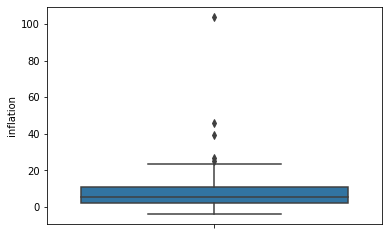

In [264]:
# Plotting the box plot for inflation
sns.boxplot(y = countries_df['inflation'])

###### The boxplot for inflation suggests that the median lies around 5. While the maximum of non outlying data is a little more than 20,the outliers go as high as more than 100

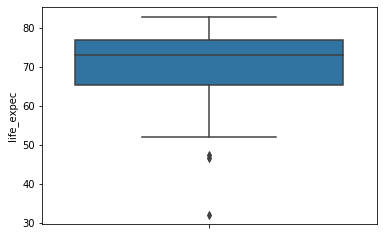

In [265]:
# Plotting the box plot for life expectancy

sns.boxplot(y = countries_df['life_expec'])

###### The boxplot for life expectancy ia a little different. It suggests that the median lies around 75. There are outliers at the lower level, going as low as around 30 in some countries.

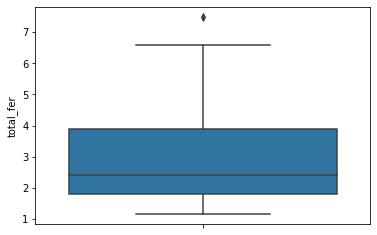

In [266]:
# Plotting the box plot for total fertility

sns.boxplot(y = countries_df['total_fer'])

###### The boxplot for total fertility suggests that the median lies in between 2-3. While the maximum of non outlying data lies around 6-7, there is an outlier which lies more than 7

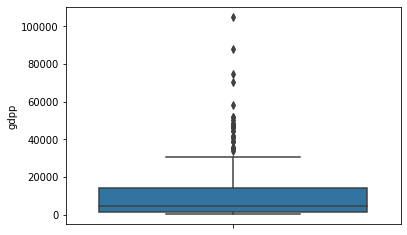

In [267]:
# Plotting the box plot for gdp

sns.boxplot(y = countries_df['gdpp'])

###### The boxplot for gdpp suggests that the median lies around 4000. While the maximum of non outlying data lies around 30000, there are a lot many outliers,going as high as more than 100000.

### Bivariate Analysis

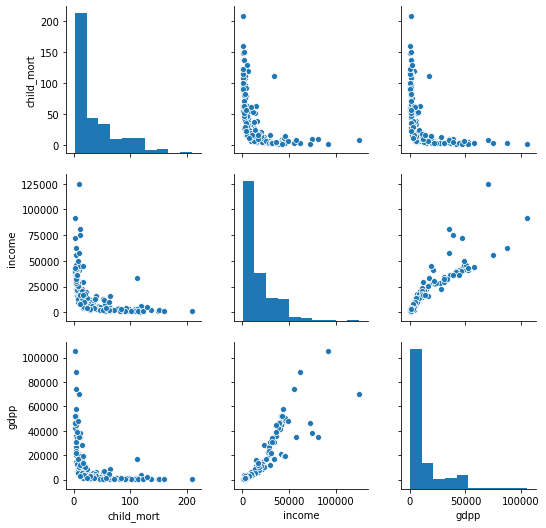

In [268]:
# drawing the pair plot between child_mort,income and gdpp

sns.pairplot(data=countries_df,vars=['child_mort','income','gdpp'])



##### The pair plot suggests a strong corelation between gdp and income. 
##### There is also a strong corelation between gdp and child_mort and income and child_mort

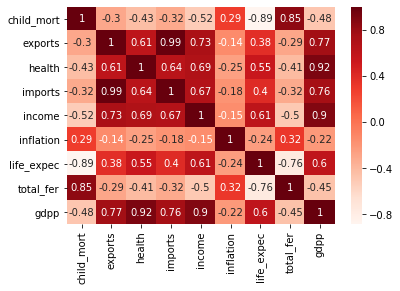

In [269]:
###Heat map between continuous variables

ax = sns.heatmap(countries_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].corr(),annot =True,cmap='Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

##### We can see a strong corelation between income and gdp, child_mort and total_fer,exports and imports as well

#### Data Preparation for Modelling

#### Outlier Treatment

In [270]:
# removing outliers(<5% and >95 %)
# removing (statistical) outliers

#outlier treatment for child_mort
Q1 = countries_df.child_mort.quantile(0.05)
Q3 = countries_df.child_mort.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.child_mort >= Q1 - 1.5*IQR) & (countries_df.child_mort <= Q3 + 1.5*IQR)]

# outlier treatment for exports
Q1 = countries_df.exports.quantile(0.05)
Q3 = countries_df.exports.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.exports >= Q1 - 1.5*IQR) & (countries_df.exports <= Q3 + 1.5*IQR)]

# outlier treatment for health
Q1 = countries_df.health.quantile(0.05)
Q3 = countries_df.health.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.health >= Q1 - 1.5*IQR) & (countries_df.health <= Q3 + 1.5*IQR)]

#outlier treatment for imports
Q1 = countries_df.imports.quantile(0.05)
Q3 = countries_df.imports.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.imports >= Q1 - 1.5*IQR) & (countries_df.imports <= Q3 + 1.5*IQR)]

# outlier treatment for income
Q1 = countries_df.income.quantile(0.05)
Q3 = countries_df.income.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.income >= Q1 - 1.5*IQR) & (countries_df.income <= Q3 + 1.5*IQR)]

# outlier treatment for inflation
Q1 = countries_df.inflation.quantile(0.05)
Q3 = countries_df.inflation.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.inflation >= Q1 - 1.5*IQR) & (countries_df.inflation <= Q3 + 1.5*IQR)]

#outlier treatment for life_expec
Q1 = countries_df.life_expec.quantile(0.05)
Q3 = countries_df.life_expec.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.life_expec >= Q1 - 1.5*IQR) & (countries_df.life_expec <= Q3 + 1.5*IQR)]

# outlier treatment for total_fer
Q1 = countries_df.total_fer.quantile(0.05)
Q3 = countries_df.total_fer.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.total_fer >= Q1 - 1.5*IQR) & (countries_df.total_fer <= Q3 + 1.5*IQR)]

# outlier treatment for gdpp
Q1 = countries_df.gdpp.quantile(0.05)
Q3 = countries_df.gdpp.quantile(0.95)
IQR = Q3 - Q1
countries_df = countries_df[(countries_df.gdpp >= Q1 - 1.5*IQR) & (countries_df.gdpp <= Q3 + 1.5*IQR)]


In [271]:
countries = countries_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [272]:
# rescaling

scaler = MinMaxScaler()
countries_scaled = scaler.fit_transform(countries)
countries_scaled

array([[0.42648491, 0.001081  , 0.00336342, ..., 0.47534517, 0.73322684,
        0.0036771 ],
       [0.06815969, 0.02280951, 0.02948565, ..., 0.87179487, 0.06709265,
        0.04406811],
       [0.12025316, 0.03412212, 0.02001679, ..., 0.87573964, 0.26517572,
        0.04829335],
       ...,
       [0.10077897, 0.01878239, 0.00887583, ..., 0.8086785 , 0.11501597,
        0.01232171],
       [0.26144109, 0.00781347, 0.00636206, ..., 0.69822485, 0.54952077,
        0.01232171],
       [0.39191821, 0.01074808, 0.00845852, ..., 0.39250493, 0.66613419,
        0.01403465]])

In [273]:
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.001081,0.003363,0.005879,0.012514,0.272401,0.475345,0.733227,0.003677
1,0.068160,0.022810,0.029486,0.047171,0.116526,0.173618,0.871795,0.067093,0.044068
2,0.120253,0.034122,0.020017,0.033230,0.153655,0.405308,0.875740,0.265176,0.048293
3,0.566699,0.043822,0.010148,0.035934,0.066145,0.531032,0.552268,0.787540,0.037673
4,0.037488,0.110645,0.083558,0.170568,0.231164,0.112752,0.881657,0.143770,0.136681


### Hopkins Score Calculation

In [274]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [275]:
countries_scaled = pd.DataFrame(countries_scaled)

hopkins(countries_scaled)

0.8902049344279547

A Hopkins score of 0.89 suggests that we can proceed with clustering

### Kmeans Modelling

In [276]:
#k means with some arbitrary k
kmeans = KMeans(n_clusters  =4, max_iter= 50)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [277]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3,
       2, 0, 3, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2,
       0, 1, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0])

### Finding the optimal clusters

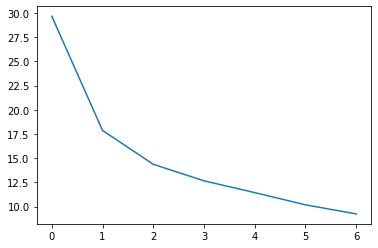

In [278]:
#elbow curve
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters  =num_clusters, max_iter= 50)
    kmeans.fit(countries_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [279]:
### Silhouette analysis

range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    #initialize kmeans
    kmeans = KMeans(n_clusters  =num_clusters, max_iter= 50)
    kmeans.fit(countries_scaled)
    
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg = silhouette_score(countries_scaled,cluster_labels)
    print("For n_clusters={0}, silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, silhouette score is 0.46060062910277355
For n_clusters=3, silhouette score is 0.4344919463384819
For n_clusters=4, silhouette score is 0.4185598310129478
For n_clusters=5, silhouette score is 0.29825418541401505
For n_clusters=6, silhouette score is 0.29359549012208896
For n_clusters=7, silhouette score is 0.28970808925199226
For n_clusters=8, silhouette score is 0.2849834033387724


In [280]:
# model with 3 clusters
kmeans = KMeans(n_clusters  =3, max_iter= 50)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [281]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 1])

In [282]:
#assigning the labels to countries
countries_df['cluster_id']=kmeans.labels_
countries_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,1


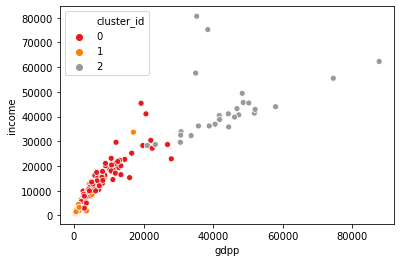

In [283]:
sns.scatterplot(x = 'gdpp',y = 'income', hue = 'cluster_id', data = countries_df,palette  = 'Set1')

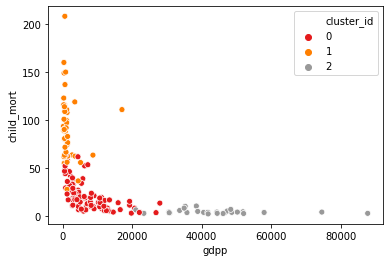

In [284]:
sns.scatterplot(x = 'gdpp',y = 'child_mort', hue = 'cluster_id', data = countries_df,palette  = 'Set1')

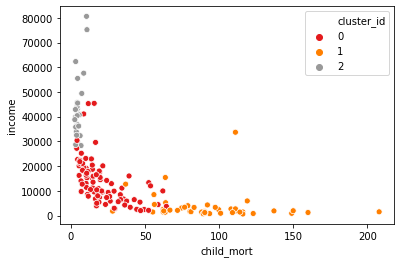

In [285]:
sns.scatterplot(x = 'child_mort',y = 'income', hue = 'cluster_id', data = countries_df,palette  = 'Set1')

                    gdpp        income  child_mort
cluster_id                                        
0            7536.285714  13605.384615   21.438462
1            1681.822222   3480.511111   92.468889
2           43677.777778  43500.000000    4.981481


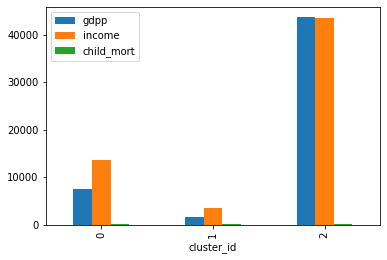

In [286]:
mean_value = countries_df.groupby('cluster_id')[['gdpp','income','child_mort']].mean()
print(mean_value)
mean_value.plot.bar()

##### We see from the chart above that the countries in cluster 2 have the  lowest child mortality rate mean, highest income mean and highest gdp mean where as the ones in cluster 1 have the highest child mortality rate mean,lowest income mean and the lowest gdp mean. Hence, we can conclude that the countries belonging to cluster 1 are in the dire need of aid

In [287]:
#countries_df.sort_values(by=['gdpp','income','child_mort'],ascending = [True,True,False],inplace = True)

#countries_df.head(5)
countries_df[countries_df['cluster_id']==1].sort_values(by=['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1


### Hierarchical Clustering

In [288]:
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.001081,0.003363,0.005879,0.012514,0.272401,0.475345,0.733227,0.003677
1,0.068160,0.022810,0.029486,0.047171,0.116526,0.173618,0.871795,0.067093,0.044068
2,0.120253,0.034122,0.020017,0.033230,0.153655,0.405308,0.875740,0.265176,0.048293
3,0.566699,0.043822,0.010148,0.035934,0.066145,0.531032,0.552268,0.787540,0.037673
4,0.037488,0.110645,0.083558,0.170568,0.231164,0.112752,0.881657,0.143770,0.136681


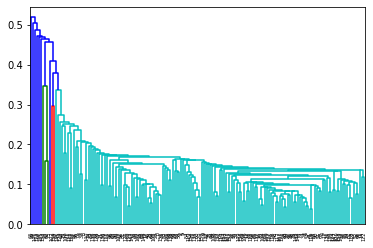

In [289]:
# single linkage
mergings = linkage(countries_scaled,method = 'single',metric = 'euclidean')
dendrogram(mergings)
plt.show()

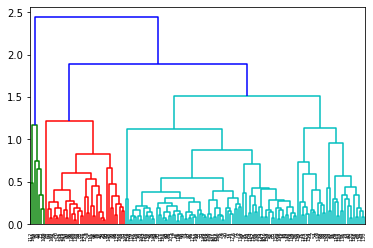

In [290]:
# complete linkage
mergings = linkage(countries_scaled,method = 'complete',metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [291]:
# create 3 clusters
cluster_labels = cut_tree(mergings,n_clusters  =3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0])

In [292]:
countries_df['cluster_labels'] = cluster_labels
countries_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,1
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,1,0


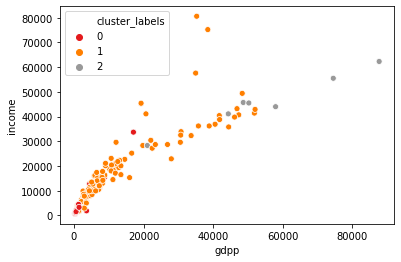

In [293]:
sns.scatterplot(x = 'gdpp',y = 'income', hue = 'cluster_labels', data = countries_df,palette  = 'Set1')

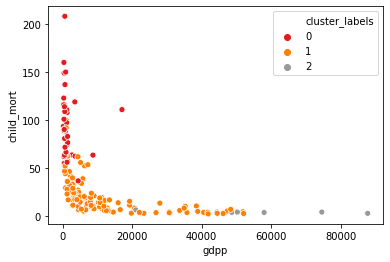

In [294]:
sns.scatterplot(x = 'gdpp',y = 'child_mort', hue = 'cluster_labels', data = countries_df,palette  = 'Set1')

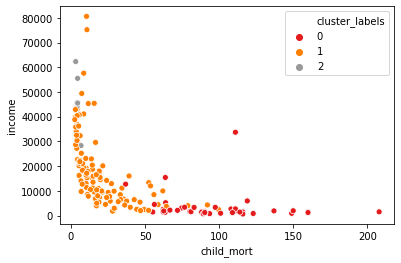

In [295]:
sns.scatterplot(x = 'child_mort',y = 'income', hue = 'cluster_labels', data = countries_df,palette  = 'Set1')

                        gdpp        income  child_mort
cluster_labels                                        
0                1650.307692   3436.230769   95.989744
1               12748.051282  18058.119658   21.120513
2               54985.714286  46057.142857    4.542857


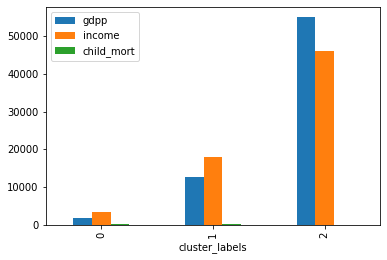

In [296]:
#plot
mean_value = countries_df.groupby('cluster_labels')[['gdpp','income','child_mort']].mean()
print(mean_value)
mean_value.plot.bar()


##### We see from the chart above that the countries in cluster 0 have the highest child mortality rate mean,lowest income mean and lowest gdp mean where as the ones in cluster 2 have the lowest child mortality rate mean,highest income mean and highest gdp mean. Hence, we can conclude that the countries belonging to cluster 0 are in the dire need of aid

In [297]:
# Finding the countries
countries_df[countries_df['cluster_labels']==0].sort_values(by=['child_mort','income','gdpp'],ascending = [False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1,0
